# LOGISTIC REGRESSION

## Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [13]:
train_df.duplicated().sum()

0

In [15]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
for i in train_df.isna().sum():
    print(round(i/len(train_df)*100,2),'%')

0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
19.87 %
0.0 %
0.0 %
0.0 %
0.0 %
77.1 %
0.22 %


In [118]:
'''
Age column contain 19.87% null value I will replace it with median because outliers are also present.
Cabin column contain 77.1% of null values so I will drop this column due to excessive missing data.
Embarked column contain only 0.22% of null values so I will Impute with the most frequent port.
'''

In [19]:
train_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

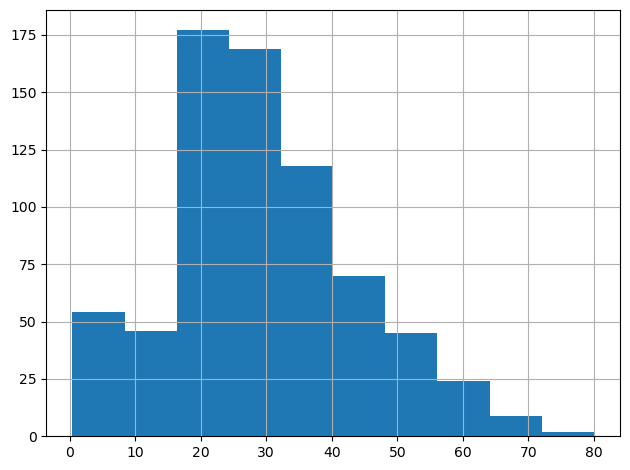

In [21]:
#plt.figure(figsize=(30,15))
train_df['Age'].hist()
plt.tight_layout()
plt.show()

In [ ]:
'''
distribution is highly skewed to the left (with a long tail on the right), 
it means that the majority of passengers were younger, with fewer older passengers.
'''

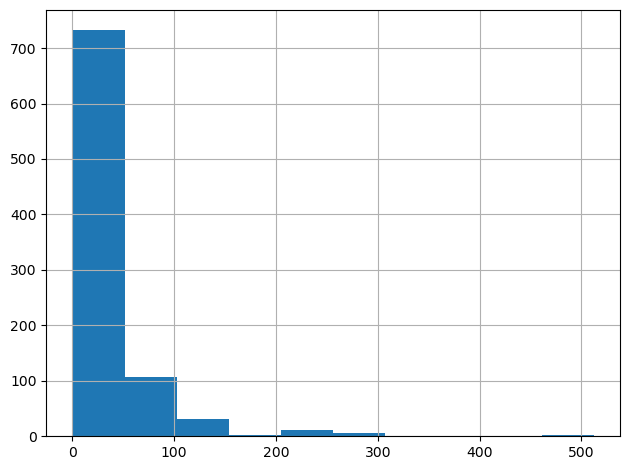

In [23]:
train_df['Fare'].hist()
plt.tight_layout()
plt.show()

In [ ]:
# as we can see skewed distribution because many passengers paying lower fares and a few paying very high fares which are outliers.

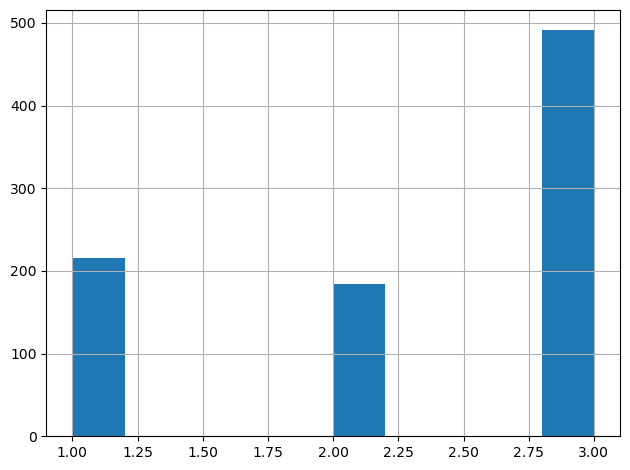

In [25]:
train_df['Pclass'].hist()
plt.tight_layout()
plt.show()

In [ ]:
#Pclass shows a categorical distribution of higher number of passengers in 3rd class , 2nd class and 1st class.

## Data Preprocessing

In [27]:
age_Median=train_df['Age'].median()
age_Median

28.0

In [29]:
train_df['Age']=train_df['Age'].fillna(age_Median)

In [31]:
age_Median=test_df['Age'].median()
age_Median

27.0

In [33]:
test_df['Age']=test_df['Age'].fillna(age_Median)

In [35]:
# Replaced null values with median due to present of outliers. 

In [37]:
most_frequent_port_train = train_df['Embarked'].mode()[0]

In [39]:
train_df.fillna({'Embarked' : most_frequent_port_train}, inplace = True)

In [41]:
most_frequent_port_test = test_df['Embarked'].mode()[0]

In [43]:
test_df.fillna({'Embarked' : most_frequent_port_test}, inplace = True)

In [45]:
# Imputed with most frequent port because outliers are not present. 

In [47]:
train_df.drop(columns = ['Cabin'], inplace = True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [49]:
test_df.drop(columns = ['Cabin'], inplace = True)
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S


In [51]:
#dropped the cabin column due to excessive missing data.

In [53]:
from sklearn.preprocessing import LabelEncoder

In [55]:
label_enc = LabelEncoder()
train_df['Sex'] = label_enc.fit_transform(train_df['Sex'])
test_df['Sex'] = label_enc.transform(test_df['Sex'])

In [57]:
le_encoder = LabelEncoder()
train_df['Embarked'] = label_enc.fit_transform(train_df['Embarked'])
test_df['Embarked'] = label_enc.transform(test_df['Embarked'])

In [59]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0


In [61]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,27.0,0,0,A.5. 3236,8.0500,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,2
416,1308,3,"Ware, Mr. Frederick",1,27.0,0,0,359309,8.0500,2


In [63]:
#converted categorical data to numerical with LabelEncoder.

In [65]:
train_df.drop(columns = ['PassengerId', 'Name','Ticket'], inplace = True)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [67]:
test_df.drop(columns = ['PassengerId', 'Name','Ticket'], inplace = True)
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,27.0,0,0,8.0500,2


In [69]:
# Dropped PassengerId, Name, and Ticket because not useful 

In [71]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [73]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [75]:
fare_Median=test_df['Fare'].median()
fare_Median

14.4542

In [77]:
test_df['Fare']=test_df['Fare'].fillna(age_Median)

## Model Building

In [80]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_train = train_df[features]
y_train = train_df['Survived']

X_test = test_df[features]


In [82]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [84]:
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Model Evaluation

In [87]:
from sklearn.metrics import accuracy_score, classification_report

In [89]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model.fit(X_train_split, y_train_split)
val_preds = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, val_preds))
print(classification_report(y_val, val_preds))


Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [93]:
X = train_df[features]
y = train_df['Survived']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy : ", accuracy)
print("Precision :", precision)
print("Recall :", recall)
print("f1_score :", f1)
print("ROC_AUC Score :", roc_auc)
    

Accuracy :  0.8100558659217877
Precision : 0.7857142857142857
Recall : 0.7432432432432432
f1_score : 0.7638888888888888
ROC_AUC Score : 0.8001930501930502


In [ ]:
'''
The model predicted an accuracy of 0.81, meaning it correctly predicted whether a passenger survived or not 81% of the time. 
The precision is 0.78, indicating that when the model predicted a passenger survived, it was correct 78% of the time.
Recall, which measures how many of the actual survivors the model correctly identified, is 0.74, 
showing that the model missed about 25% of the survivors.
The F1 score of 0.76 balances precision and recall, reflecting a solid overall performance.
Finally, the ROC AUC score of 0.80 suggests that the model is effective at distinguishing between survivors and non-survivors.
'''

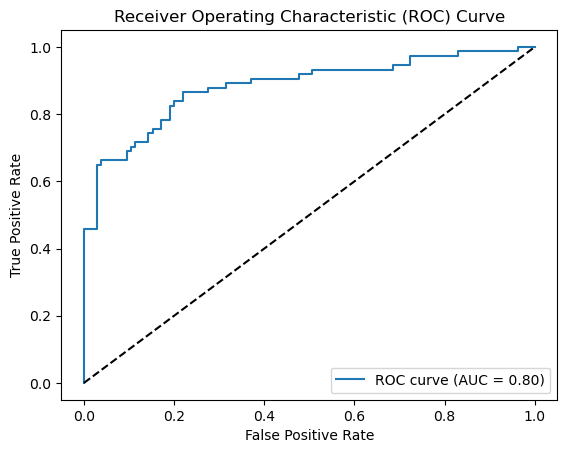

In [99]:
y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
'''
the ROC curve rises well above the diagonal line, which represents random guessing.
The AUC (Area Under the Curve) score is approximately 0.80, indicating that the model has a good ability to separate the two classes.
A higher AUC means better performance, and a score of 0.80 suggests that the model is effective in predicting survival.
'''

## Interpretation

In [101]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print(coefficients)

    Feature  Coefficient
0    Pclass    -0.930680
1       Sex    -2.596995
2       Age    -0.030433
3     SibSp    -0.293906
4     Parch    -0.111852
5      Fare     0.002534
6  Embarked    -0.218777


In [ ]:
'''
The model shows that being female, younger, in a higher class, and paying a higher fare increased the chances of survival,
while being male, older, and traveling with more family members slightly decreased the survival probability.
'''

## Model Deployment 

In [103]:
from pickle import dump

In [105]:
dump(model,open('LogisticRegression.pkl','wb'))

In [107]:
from pickle import load

In [109]:
loaded_model = load(open('LogisticRegression.pkl','rb'))

In [111]:
loaded_model.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

# Interview Questions 

#### 1. What is the difference between precision and recall?

In [ ]:
'''
Precision is how many of the predicted positive are actually correct.
and recall is how many of the actual positives model successfully found.
In short Precision is all positive predictions and recall is all actual predictions.
'''

#### 2. What is cross-validation, and why is it important in binary classification?

In [ ]:
'''
Cross validation is a way to test how well a model will perform by splitting the data into parts,
training on some and testing on others. 
Binary classification is important because it helps make sure the model works well for both classes
and avoids overfitting to the training data.
'''